# 00. Table of Contents

**01. Notebook Setup**

**02. File Import + Checks**

**03. Data Exploration + Answering Key Business Questions** 

    - 03.03 Customer Profiling

**04. Notebook Wrapup**

# 01. Notebook Setup

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create quick path to project folder

projpath = r'/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A4 - Python Fundamentals for Data Analysts/Submitted Tasks/2024-01 Instacart Basket Analysis'

# 02. File Import + Checks + Merge

#### Step 1 - Import the data set you exported in previous notebook into a new Jupyter notebook.

## File Import

In [3]:
# Import orders_products_include.pkl data file

df_include = pd.read_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_include.pkl'))

In [4]:
# Import deptid_dept.pkl data file from Exercise 4.4 that matched the department_id to the name of the department

df_dept = pd.read_csv(os.path.join(projpath, '02 Data', 'Prepared Data', 'deptid_dept.csv'), index_col = False)

## DF Checks

In [5]:
# Check dimensions of inclusion df - should have (30964564, 33) for shape

df_include.shape

(30964564, 33)

**Confirmed** Import pulled in correctly (rows/columns)

In [6]:
# Check output - view current column headers

df_include.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customers_first_order,product_id,add_to_cart_order,reordered,...,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Include
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Include
2,473747,1,3,3,12,21.0,0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Include
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Include
4,431534,1,5,4,15,28.0,0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Include


In [7]:
# Check data types for each column

df_include.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    object  
 1   user_id                     object  
 2   order_number                int64   
 3   orders_day_of_week          int64   
 4   order_hour_of_day           int64   
 5   days_since_prior_order      float64 
 6   customers_first_order       int64   
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    int64   
 12  department_id               int64   
 13  prices                      float64 
 14  price_range_loc             object  
 15  busiest_days                object  
 16  busiest_period_of_day       object  
 17  max_order                   int64   
 18  loyalty_flag                object  
 19  avg

In [8]:
# Change the data type of the user_id column in customer df to string and override as new type

df_include['order_id'] = df_include['order_id'].astype('str')

In [9]:
# Check to ensure data type change has occurred

df_include['order_id'].dtype

dtype('O')

In [10]:
# Change the data type of the department_id column in customer df to string and override as new type

df_include['department_id'] = df_include['department_id'].astype('str')

In [11]:
# Check to ensure data type change has occurred

df_include['department_id'].dtype

dtype('O')

In [12]:
# Remove _merge column so that can use later for merge check

df_include = df_include.drop(columns = ['_merge'])

In [13]:
# Verify shape after all consistency and quality checks - should now only have 32 columns

df_include.shape

(30964564, 32)

In [14]:
# Check dimensions of department df - should have 21 rows and 2 columns

df_dept.shape

(21, 2)

**Confirmed** Import pulled in correctly (rows/columns)

In [15]:
# Check output - view current column headers and data type

df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [16]:
# Change the data type of the department_id column in customer df to string and override as new type

df_dept['department_id'] = df_dept['department_id'].astype('str')

In [17]:
# Check to ensure data type change has occurred

df_dept['department_id'].dtype

dtype('O')

## DF Merge

Decided to merge in the department df that was created in Exercise 4.4 so that could see department names instead of just numbers for profile analyses.

In [18]:
# Merge df_ords_prods with df_prods using inner join merge and merge flag

df_include_merged = df_include.merge(df_dept, on = 'department_id', indicator = True)

In [19]:
df_include_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customers_first_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,Number_of_Dependants,Family_Status,income,Region,exclusion_flag,department,_merge
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,Include,beverages,both
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Include,beverages,both
2,473747,1,3,3,12,21.0,0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Include,beverages,both
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Include,beverages,both
4,431534,1,5,4,15,28.0,0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Include,beverages,both


In [20]:
# Check the merge flag to ensure all rows from both dfs were included

df_include_merged['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

**Confirmed** Merge includes data that was in both dfs

# 03. Data Exploration + Answering Key Business Questions

# 03.03 Customer Profiling

#### Step 5 - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

### Creating Additional Flags for Profile Use

#### Categorize Customer by Age

In [21]:
# Check distribution of ages

df_include_merged.agg({'Age': ['mean', 'min', 'max']})

,Age
mean,49.468026
min,18.000000
max,81.000000


In [22]:
# Create a function to categorize customers by age - Age Groups (child, young adult, adult, elder)

df_include_merged.loc[df_include_merged['Age'] >= 65, 'Age_Group'] = 'Elder'
df_include_merged.loc[(df_include_merged['Age'] < 65) & (df_include_merged['Age'] >= 25), 'Age_Group'] = 'Adult'
df_include_merged.loc[(df_include_merged['Age'] < 25) & (df_include_merged['Age'] >= 18), 'Age_Group'] = 'Young Adult'
df_include_merged.loc[df_include_merged['Age'] < 18, 'Age_Group'] = 'Child'

In [23]:
# Check the counts of each flag

df_include_merged['Age_Group'].value_counts(dropna = False)

Age_Group
Adult          19353826
Elder           8195544
Young Adult     3415194
Name: count, dtype: int64

In [24]:
# Verify all records were classified - ensure flag totals equal 30964564 (number of rows in inclusion df)

19353826 + 8195544 + 3415194

30964564

In [25]:
pd.options.display.max_rows = None

In [26]:
# Verify that the categorization results are expected

df_include_merged[['Age', 'Age_Group']].tail(50)

,Age,Age_Group
30964514,68,Elder
30964515,68,Elder
30964516,68,Elder
30964517,68,Elder
30964518,68,Elder
30964519,68,Elder
30964520,68,Elder
30964521,68,Elder
30964522,68,Elder
30964523,68,Elder


**Confirmed** Categorization of age groups worked as expected.

#### Categorize Customer by Income

In [27]:
# Check distribution of incomes

df_include_merged.agg({'income': ['mean', 'std', 'min', 'max']})

,income
mean,99675.865108
std,43141.865526
min,25903.000000
max,593901.000000


In [28]:
# Calculate range to account for an average income as one standard deviation above and below mean

bottom_avg_inc = df_include_merged['income'].mean() - df_include_merged['income'].std()
top_avg_inc = df_include_merged['income'].mean() + df_include_merged['income'].std() 

In [29]:
print(bottom_avg_inc)

56533.999581491


In [30]:
print(top_avg_inc)

142817.73063360262


In [31]:
# Create a function to categorize customers by income level - Income Levels (below average, average, above average)

df_include_merged.loc[df_include_merged['income'] >= 142818, 'Income_Level'] = 'Above Avg Income'
df_include_merged.loc[(df_include_merged['income'] < 142818) & (df_include_merged['income'] >= 56534), 'Income_Level'] = 'Avg Income'
df_include_merged.loc[df_include_merged['income'] < 56534, 'Income_Level'] = 'Below Avg Income'

In [32]:
# Check the counts of each flag

df_include_merged['Income_Level'].value_counts(dropna = False)

Income_Level
Avg Income          20923960
Above Avg Income     5173082
Below Avg Income     4867522
Name: count, dtype: int64

In [33]:
# Verify all records were classified - ensure flag totals equal 30964564 (number of rows in inclusion df)

20923960 + 5173082 + 4867522

30964564

In [34]:
# Verify that the categorization results are expected

df_include_merged[['income', 'Income_Level']].tail(100)

,income,Income_Level
30964464,36766,Below Avg Income
30964465,36766,Below Avg Income
30964466,48467,Below Avg Income
30964467,48467,Below Avg Income
30964468,48467,Below Avg Income
30964469,48467,Below Avg Income
30964470,48467,Below Avg Income
30964471,48467,Below Avg Income
30964472,48467,Below Avg Income
30964473,48467,Below Avg Income


**Confirmed** Categorization of income level worked as expected.

#### Categorize Customer by Household Type (Children or No children)

In [35]:
# Create a function to flag customers by household type (kids or no kids) 

df_include_merged.loc[df_include_merged['Number_of_Dependants'] > 0, 'Household_Type'] = 'Has Children'
df_include_merged.loc[df_include_merged['Number_of_Dependants'] <= 0, 'Household_Type'] = 'Does Not Have Children'

In [36]:
# Check the counts of each flag

df_include_merged['Household_Type'].value_counts(dropna = False)

Household_Type
Has Children              23224883
Does Not Have Children     7739681
Name: count, dtype: int64

In [37]:
# Verify all records were classified - ensure flag totals equal 30964564 (number of rows in inclusion df)

23224883 + 7739681

30964564

In [38]:
# Verify that the categorization results are expected

df_include_merged[['Number_of_Dependants', 'Household_Type']].tail(100)

,Number_of_Dependants,Household_Type
30964464,2,Has Children
30964465,2,Has Children
30964466,3,Has Children
30964467,3,Has Children
30964468,3,Has Children
30964469,3,Has Children
30964470,3,Has Children
30964471,3,Has Children
30964472,3,Has Children
30964473,3,Has Children


**Confirmed** Categorization of household type worked as expected.

In [39]:
# View all columns in updated df

for col in df_include_merged.columns:
    print(col)

order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
customers_first_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_prod_price
spending_flag
median_days_since_purchase
frequency_flag
Gender
State
Age
date_joined
Number_of_Dependants
Family_Status
income
Region
exclusion_flag
department
_merge
Age_Group
Income_Level
Household_Type


### Creating Profiles

#### Profile Creation for Lifestyle, Income, and Household Type

Note: Lifestyle pulls from Family Status where Married is Married and all other statuses (single, divorced/widowed, living with parents and siblings) are considered Single

In [40]:
# Create a profile tag for Single* Below Avg Income Household w/Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Below Avg Income Household w/Kids'

In [41]:
# Create a profile tag for Single* Avg Income Household w/Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Avg Income Household w/Kids'

In [42]:
# Create a profile tag for Single* Above Avg Income Household w/Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Above Avg Income Household w/Kids'

In [43]:
# Create a profile tag for Single* Below Avg Income Household w/o Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Below Avg Income Household w/o Kids'

In [44]:
# Create a profile tag for Single* Avg Income Household w/o Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Avg Income Household w/o Kids'

In [45]:
# Create a profile tag for Single* Above Avg Income Household w/o Kids

df_include_merged.loc[(df_include_merged['Family_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Single* Above Avg Income Household w/o Kids'

In [46]:
# Create a profile tag for Married Below Avg Income Household w/Kids 

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Below Avg Income Household w/Kids'

In [47]:
# Create a profile tag for Married Avg Income Household w/Kids 

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Avg Income Household w/Kids'

In [48]:
# Create a profile tag for Married Above Avg Income Household w/Kids 

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Above Avg Income Household w/Kids'

In [49]:
# Create a profile tag for Married Below Avg Income Household w/o Kids

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Below Avg Income Household w/o Kids'

In [50]:
# Create a profile tag for Married Avg Income Household w/o Kids

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Avg Income Household w/o Kids'

In [51]:
# Create a profile tag for Married Above Avg Income Household w/o Kids 

df_include_merged.loc[(df_include_merged['Family_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Lifestyle_Income_Household'] = 'Married Above Avg Income Household w/o Kids'

In [52]:
# Check the counts of each flag

df_include_merged['Customer_Profile_Lifestyle_Income_Household'].value_counts(dropna = False)

Customer_Profile_Lifestyle_Income_Household
Married Avg Income Household w/Kids            14626870
Single* Avg Income Household w/o Kids           5209128
Married Above Avg Income Household w/Kids       3843248
Married Below Avg Income Household w/Kids       3273593
Single* Above Avg Income Household w/o Kids     1313889
Single* Below Avg Income Household w/o Kids     1216664
Single* Avg Income Household w/Kids             1087962
Single* Below Avg Income Household w/Kids        377265
Single* Above Avg Income Household w/Kids         15945
Name: count, dtype: int64

In [53]:
# Verify all records were classified - ensure flag totals equal 30964564 (number of rows in inclusion df)

14626870 + 5209128 + 3843248 + 3273593 + 1313889 + 1216664 + 1087962 + 377265 + 15945

30964564

**Observation** 

- All records have been categorized for this profile.
- It appears that there are no customers who are married and without children. This seems odd. But perhaps it is an error in the data provided for the project or the married w/o children customers were excluded for placing less than five orders.

#### Profile Creation for Age and Income

In [54]:
# Create a profile tag for Young Adult w/Below Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Below Avg Income'

In [55]:
# Create a profile tag for Young Adult w/Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Avg Income'

In [56]:
# Create a profile tag for Young Adult w/Above Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult w/Above Avg Income'

In [57]:
# Create a profile tag for Adult w/Below Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Below Avg Income'

In [58]:
# Create a profile tag for Adult w/Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Avg Income'

In [59]:
# Create a profile tag for Adult w/Above Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult w/Above Avg Income'

In [60]:
# Create a profile tag for Elder Person w/Below Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Elder') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Below Avg Income'

In [61]:
# Create a profile tag for Elder Person w/Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Elder') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Avg Income'

In [62]:
# Create a profile tag for Elder Person w/Above Avg Income

df_include_merged.loc[(df_include_merged['Age_Group'] == 'Elder') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Elder Person w/Above Avg Income'

In [63]:
# Check the counts of each flag

df_include_merged['Customer_Profile_Age_Income'].value_counts(dropna = False)

Customer_Profile_Age_Income
Adult w/Avg Income                 13142930
Elder Person w/Avg Income           5274616
Adult w/Below Avg Income            3161112
Adult w/Above Avg Income            3049784
Young Adult w/Avg Income            2506414
Elder Person w/Above Avg Income     2088431
Young Adult w/Below Avg Income       873913
Elder Person w/Below Avg Income      832497
Young Adult w/Above Avg Income        34867
Name: count, dtype: int64

In [64]:
# Verify all records were classified - ensure flag totals equal 30964564 (number of rows in inclusion df)

13142930 + 5274616 + 3161112 + 3049784 + 2506414 + 2088431 + 873913 + 832497 + 34867

30964564

**Observation** All records have been categorized for this profile.

#### Step 6 - Create an appropriate visualization to show the distribution of profiles.

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Distribution')]

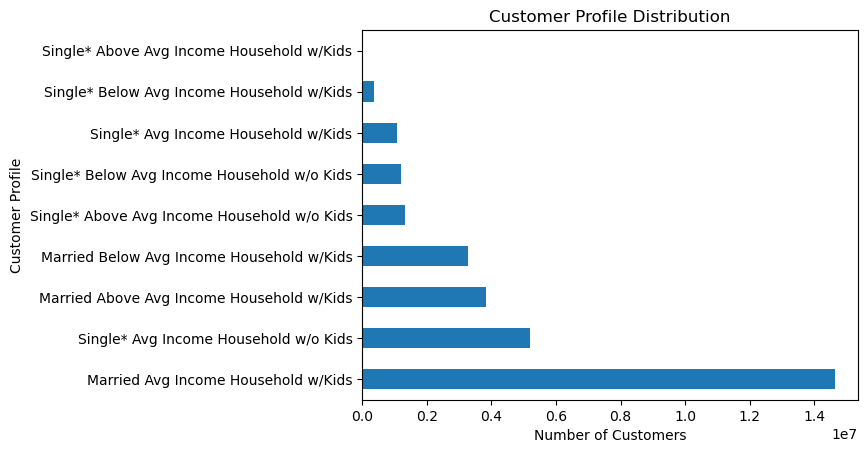

In [65]:
# Create a bar chart showing how many people are in each Lifestyle/Income/Household profile

bar_profiles_LIH = df_include_merged['Customer_Profile_Lifestyle_Income_Household'].value_counts().plot.barh()

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Distribution')

In [66]:
# Export the bar chart to my files

bar_profiles_LIH.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH.png'), bbox_inches = 'tight')

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Distribution')]

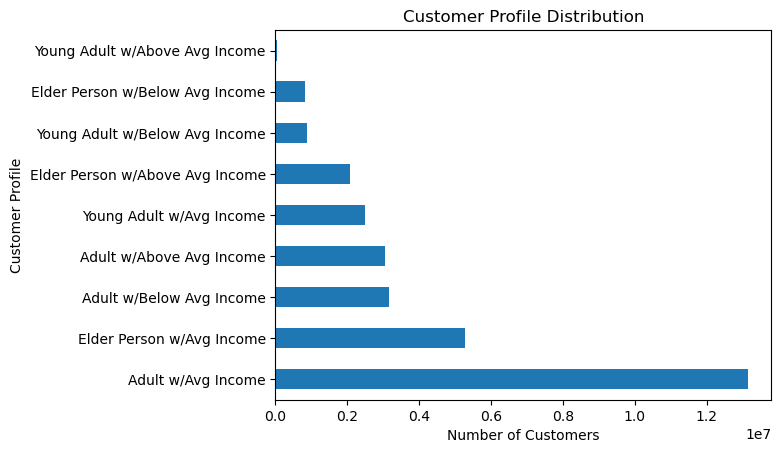

In [67]:
# Create a bar chart showing how many people are in each Age/Income profile

bar_profiles_AI = df_include_merged['Customer_Profile_Age_Income'].value_counts().plot.barh()

# Add labels and a title 

bar_profiles_AI.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Distribution')

In [68]:
# Export the bar chart to my files

bar_profiles_AI.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI.png'), bbox_inches = 'tight')

#### Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [69]:
# View the mean, min, max stats for the Lifestyle/Income/Household profiles - specifically for for the number of days since the customer's last order to show useage frequency

df_include_merged.groupby('Customer_Profile_Lifestyle_Income_Household').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                              mean  min   max
Customer_Profile_Lifestyle_Income_Household                                  
Married Above Avg Income Household w/Kids                10.749271  0.0  30.0
Married Avg Income Household w/Kids                      10.771824  0.0  30.0
Married Below Avg Income Household w/Kids                11.125317  0.0  30.0
Single* Above Avg Income Household w/Kids                 8.994808  0.0  30.0
Single* Above Avg Income Household w/o Kids              10.655653  0.0  30.0
Single* Avg Income Household w/Kids                      10.694274  0.0  30.0
Single* Avg Income Household w/o Kids                    10.755871  0.0  30.0
Single* Below Avg Income Household w/Kids                10.990936  0.0  30.0
Single* Below Avg Income Household w/o Kids              11.094831  0.0  30.0

In [70]:
# View the mean, min, max for the Lifestyle/Income/Household profiles - specifically for product price to show expenditure

df_include_merged.groupby('Customer_Profile_Lifestyle_Income_Household').agg({'prices': ['mean', 'min', 'max']})

prices           
                                                 mean  min   max
Customer_Profile_Lifestyle_Income_Household                     
Married Above Avg Income Household w/Kids    7.949598  1.0  25.0
Married Avg Income Household w/Kids          7.940510  1.0  25.0
Married Below Avg Income Household w/Kids    6.932147  1.0  25.0
Single* Above Avg Income Household w/Kids    7.961543  1.0  25.0
Single* Above Avg Income Household w/o Kids  7.934104  1.0  25.0
Single* Avg Income Household w/Kids          7.957152  1.0  25.0
Single* Avg Income Household w/o Kids        7.942731  1.0  25.0
Single* Below Avg Income Household w/Kids    7.342429  1.0  25.0
Single* Below Avg Income Household w/o Kids  6.977742  1.0  25.0

In [71]:
# View the mean, min, max stats for the Age/Income profiles - specifically for the number of days since the customer's last order to show useage frequency

df_include_merged.groupby('Customer_Profile_Age_Income').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                  mean  min   max
Customer_Profile_Age_Income                                      
Adult w/Above Avg Income                     10.728999  0.0  30.0
Adult w/Avg Income                           10.774900  0.0  30.0
Adult w/Below Avg Income                     11.136203  0.0  30.0
Elder Person w/Above Avg Income              10.719344  0.0  30.0
Elder Person w/Avg Income                    10.768556  0.0  30.0
Elder Person w/Below Avg Income              11.122190  0.0  30.0
Young Adult w/Above Avg Income                9.977269  0.0  30.0
Young Adult w/Avg Income                     10.695739  0.0  30.0
Young Adult w/Below Avg Income               10.988447  0.0  30.0

In [72]:
# View the mean, min, max for the Lifestyle/Income/Household profiles - specifically for product price to show expenditure

df_include_merged.groupby('Customer_Profile_Age_Income').agg({'prices': ['mean', 'min', 'max']})

prices           
                                     mean  min   max
Customer_Profile_Age_Income                         
Adult w/Above Avg Income         7.937805  1.0  25.0
Adult w/Avg Income               7.941332  1.0  25.0
Adult w/Below Avg Income         7.005990  1.0  25.0
Elder Person w/Above Avg Income  7.958497  1.0  25.0
Elder Person w/Avg Income        7.936328  1.0  25.0
Elder Person w/Below Avg Income  6.506539  1.0  25.0
Young Adult w/Above Avg Income   7.868737  1.0  25.0
Young Adult w/Avg Income         7.956845  1.0  25.0
Young Adult w/Below Avg Income   7.311074  1.0  25.0

#### Step 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Lifestyle / Income / Household Profiles vs Region

In [73]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_region = pd.crosstab(df_include_merged['Region'], df_include_merged['Customer_Profile_Lifestyle_Income_Household'], dropna = False)


# View results of crosstab creation

pivot_profiles_LIH_region

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single* Above Avg Income Household w/Kids,Single* Above Avg Income Household w/o Kids,Single* Avg Income Household w/Kids,Single* Avg Income Household w/o Kids,Single* Below Avg Income Household w/Kids,Single* Below Avg Income Household w/o Kids
Region,,,,,,,,,
Midwest,917539,3409380,760343,3115,300731,260226,1253567,88094,268518
Northeast,679486,2604778,569509,774,229445,195730,901470,59926,223567
South,1257461,4852908,1113380,8334,437643,368086,1727917,129037,416373
West,988762,3759804,830361,3722,346070,263920,1326174,100208,308206


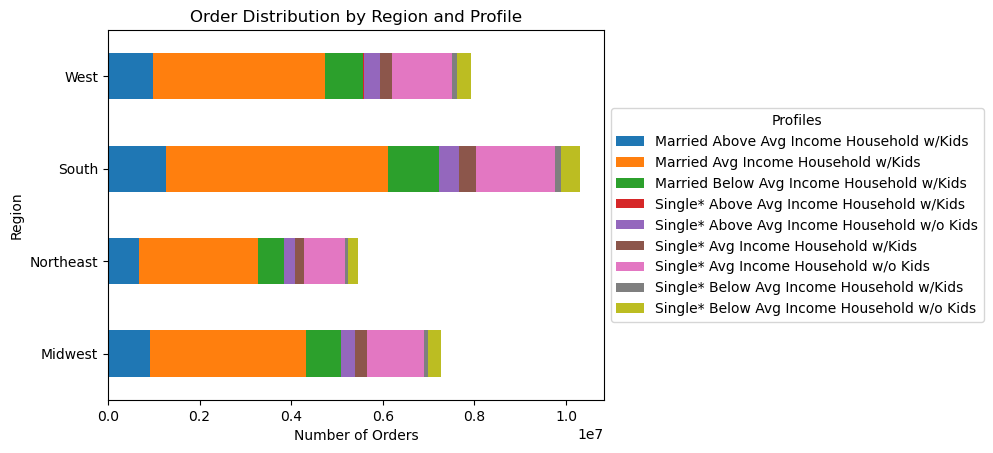

In [74]:
# Create clustered bar chart by region and LIH profile

bar_profiles_LIH_region = pivot_profiles_LIH_region.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_region.set(xlabel='Number of Orders', ylabel='Region', title='Order Distribution by Region and Profile')
bar_profiles_LIH_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [75]:
# Export the bar chart to my files

bar_profiles_LIH_region.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH_region.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Dept

In [76]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_dept = pd.crosstab(df_include_merged['department'], df_include_merged['Customer_Profile_Lifestyle_Income_Household'], dropna = False)


# View results of crosstab creation

pivot_profiles_LIH_dept

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single* Above Avg Income Household w/Kids,Single* Above Avg Income Household w/o Kids,Single* Avg Income Household w/Kids,Single* Avg Income Household w/o Kids,Single* Below Avg Income Household w/Kids,Single* Below Avg Income Household w/o Kids
department,,,,,,,,,
alcohol,21508,61776,16137,470,7519,5844,23505,2065,5803
babies,52247,204001,31435,225,18916,15162,72621,3994,11791
bakery,146097,532664,106988,673,48761,40031,193517,12980,39117
beverages,307194,1149834,350425,1233,105401,82336,411301,35538,128639
breakfast,82035,303673,85512,380,27158,23200,107988,9618,31286
bulk,3649,15713,4456,2,1274,1233,5266,398,1460
canned goods,132642,495812,84123,672,44015,36527,175419,11278,31586
dairy eggs,652019,2482191,498389,2923,222168,187335,881926,59949,190282
deli,124597,475036,102700,406,42485,35162,171556,12551,39341


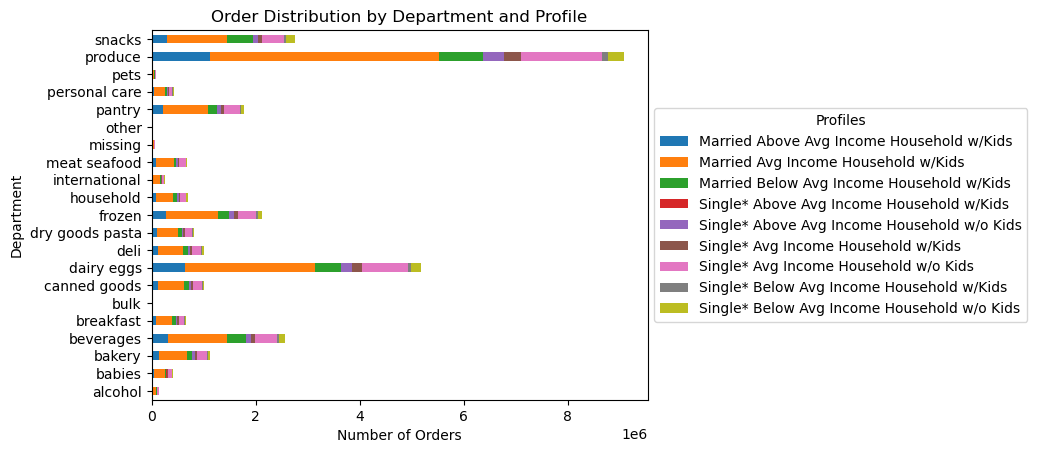

In [77]:
# Create clustered bar chart by department and LIH profile

bar_profiles_LIH_dept = pivot_profiles_LIH_dept.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_dept.set(xlabel='Number of Orders', ylabel='Department', title='Order Distribution by Department and Profile')
bar_profiles_LIH_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [78]:
# Export the bar chart to my files

bar_profiles_LIH_dept.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH_dept.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Frequency

In [89]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_freq = pd.crosstab(df_include_merged['frequency_flag'], df_include_merged['Customer_Profile_Lifestyle_Income_Household'], dropna = False)


# View results of crosstab creation

pivot_profiles_LIH_freq

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single* Above Avg Income Household w/Kids,Single* Above Avg Income Household w/o Kids,Single* Avg Income Household w/Kids,Single* Avg Income Household w/o Kids,Single* Below Avg Income Household w/Kids,Single* Below Avg Income Household w/o Kids
frequency_flag,,,,,,,,,
Frequent customer,2654560,10069657,2164608,13612,907578,757886,3574037,259016,803522
Non-frequent customer,345369,1333911,360543,413,117495,98850,469734,39383,129277
Regular customer,843319,3223302,748442,1920,288816,231226,1165357,78866,283865


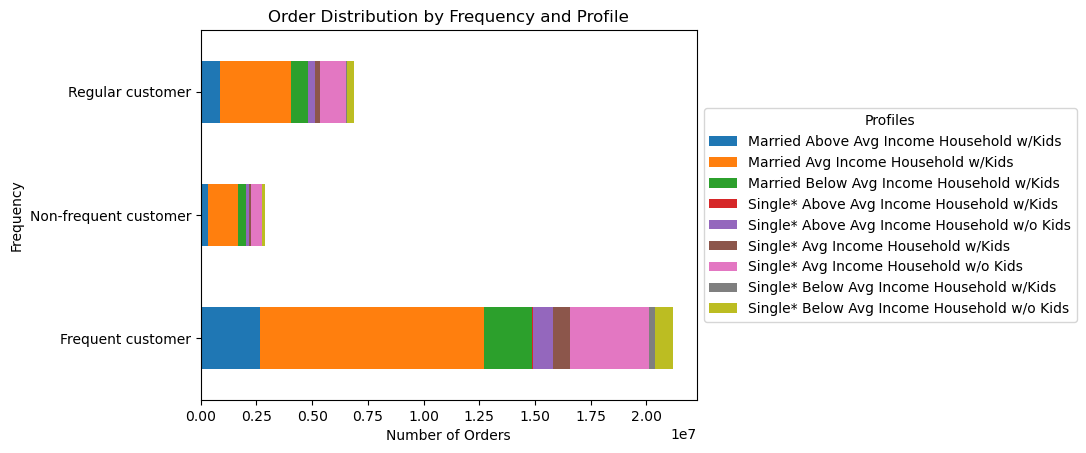

In [90]:
# Create clustered bar chart by frequency flag and LIH profile

bar_profiles_LIH_freq = pivot_profiles_LIH_freq.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_freq.set(xlabel='Number of Orders', ylabel='Frequency', title='Order Distribution by Frequency and Profile')
bar_profiles_LIH_freq.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [91]:
# Export the bar chart to my files

bar_profiles_LIH_freq.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH_freq.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Price Range

In [95]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_price = pd.crosstab(df_include_merged['price_range_loc'], df_include_merged['Customer_Profile_Lifestyle_Income_Household'], dropna = False)


# View results of crosstab creation

pivot_profiles_LIH_price

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single* Above Avg Income Household w/Kids,Single* Above Avg Income Household w/o Kids,Single* Avg Income Household w/Kids,Single* Avg Income Household w/o Kids,Single* Below Avg Income Household w/Kids,Single* Below Avg Income Household w/o Kids
price_range_loc,,,,,,,,,
High-range product,56289,203225,21987,373,18231,14877,71075,3747,8149
Low-range product,1145207,4363442,1285146,4655,391902,323305,1554459,133847,472877
Mid-range product,2641752,10060203,1966460,10917,903756,749780,3583594,239671,735638


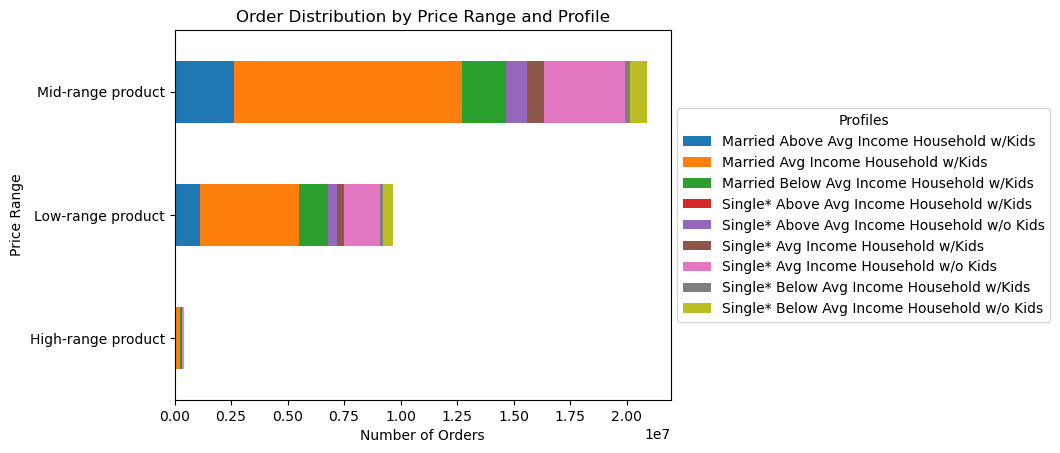

In [96]:
# Create clustered bar chart by frequency flag and LIH profile

bar_profiles_LIH_price = pivot_profiles_LIH_price.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_price.set(xlabel='Number of Orders', ylabel='Price Range', title='Order Distribution by Price Range and Profile')
bar_profiles_LIH_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [97]:
# Export the bar chart to my files

bar_profiles_LIH_price.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH_price.png'), bbox_inches = 'tight')

### Lifestyle / Income / Household Profiles vs Loyalty

In [92]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_LIH_loyalty = pd.crosstab(df_include_merged['loyalty_flag'], df_include_merged['Customer_Profile_Lifestyle_Income_Household'], dropna = False)


# View results of crosstab creation

pivot_profiles_LIH_loyalty

Customer_Profile_Lifestyle_Income_Household,Married Above Avg Income Household w/Kids,Married Avg Income Household w/Kids,Married Below Avg Income Household w/Kids,Single* Above Avg Income Household w/Kids,Single* Above Avg Income Household w/o Kids,Single* Avg Income Household w/Kids,Single* Avg Income Household w/o Kids,Single* Below Avg Income Household w/Kids,Single* Below Avg Income Household w/o Kids
loyalty_flag,,,,,,,,,
Loyal customer,1276251,4905904,1020345,7947,448306,366298,1758039,118504,382499
New customer,582121,2214223,584307,737,196058,159159,784414,61883,220793
Regular customer,1984876,7506743,1668941,7261,669525,562505,2666675,196878,613372


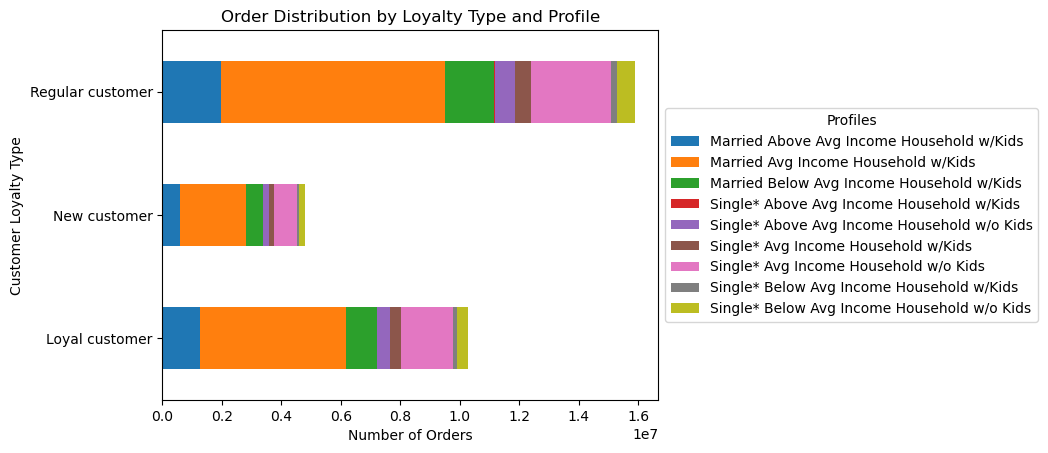

In [93]:
# Create clustered bar chart by loyalty type and LIH profile

bar_profiles_LIH_loyalty = pivot_profiles_LIH_loyalty.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_LIH_loyalty.set(xlabel='Number of Orders', ylabel='Customer Loyalty Type', title='Order Distribution by Loyalty Type and Profile')
bar_profiles_LIH_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [94]:
# Export the bar chart to my files

bar_profiles_LIH_loyalty.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_LIH_loyalty.png'), bbox_inches = 'tight')

### Age / Income Profile vs Region

In [98]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_region = pd.crosstab(df_include_merged['Region'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View results of crosstab creation

pivot_profiles_AI_region

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
Region,,,,,,,,,
Midwest,729418,3108191,728232,481815,1236004,186227,10152,578978,202496
Northeast,536735,2290208,550145,369077,965360,150370,3893,446410,152487
South,997121,4350418,1090003,693021,1736494,278946,13296,861999,289841
West,786510,3394113,792732,544518,1336758,216954,7526,619027,229089


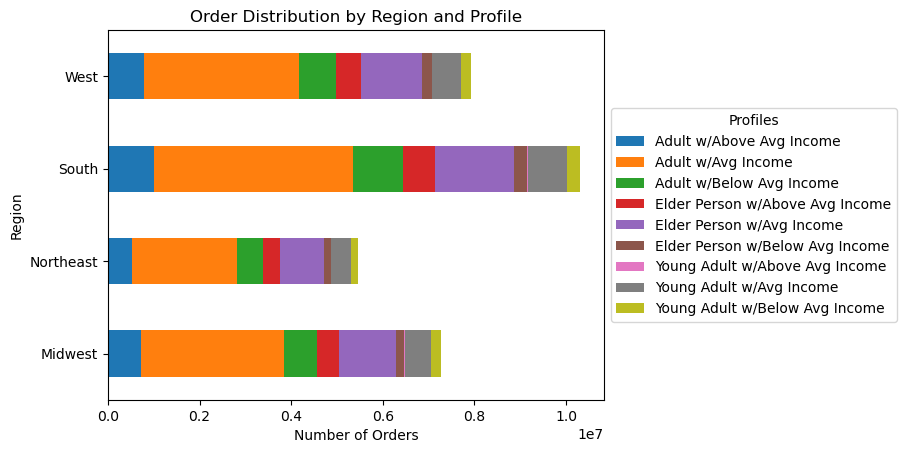

In [99]:
# Create clustered bar chart by region and LIH profile

bar_profiles_AI_region = pivot_profiles_AI_region.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_region.set(xlabel='Number of Orders', ylabel='Region', title='Order Distribution by Region and Profile')
bar_profiles_AI_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [100]:
# Export the bar chart to my files

bar_profiles_AI_region.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_region.png'), bbox_inches = 'tight')

### Age / Income Profile vs Dept

In [101]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_dept = pd.crosstab(df_include_merged['department'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View results of crosstab creation

pivot_profiles_AI_dept

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
department,,,,,,,,,
alcohol,17023,57769,15665,11252,21217,4224,1222,12139,4116
babies,42485,184717,31161,28609,71026,6569,294,36041,9490
bakery,115235,482054,103960,78641,192400,24956,1655,91758,30169
beverages,243438,1036776,328411,167377,415290,101353,3013,191405,84838
breakfast,64845,274092,81169,43807,107768,23721,921,53001,21526
bulk,2937,13593,4209,1983,5795,1167,5,2824,938
canned goods,105626,443926,83419,70347,178988,18174,1356,84844,25394
dairy eggs,518246,2230802,486910,352591,892942,122539,6273,427708,139171
deli,99164,428370,101129,67331,173041,24827,993,80343,28636


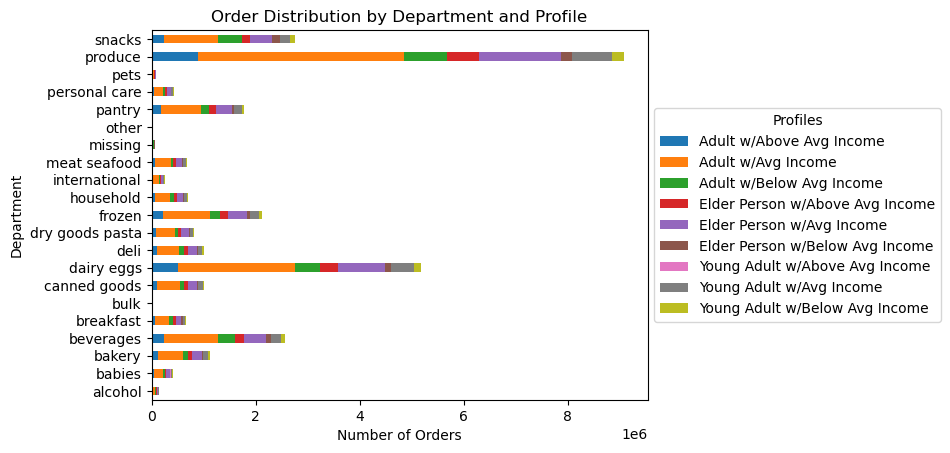

In [102]:
# Create clustered bar chart by region and LIH profile

bar_profiles_AI_dept = pivot_profiles_AI_dept.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_dept.set(xlabel='Number of Orders', ylabel='Department', title='Order Distribution by Department and Profile')
bar_profiles_AI_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [103]:
# Export the bar chart to my files

bar_profiles_AI_dept.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_dept.png'), bbox_inches = 'tight')

### Age / Income Profile vs Frequency

In [104]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_freq = pd.crosstab(df_include_merged['frequency_flag'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View results of crosstab creation

pivot_profiles_AI_freq

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
frequency_flag,,,,,,,,,
Frequent customer,2098773,9041609,2082471,1450166,3626969,553841,26811,1733002,590834
Non-frequent customer,277563,1192116,348964,183839,484549,91744,1875,225830,88495
Regular customer,673448,2909205,729677,454426,1163098,186912,6181,547582,194584


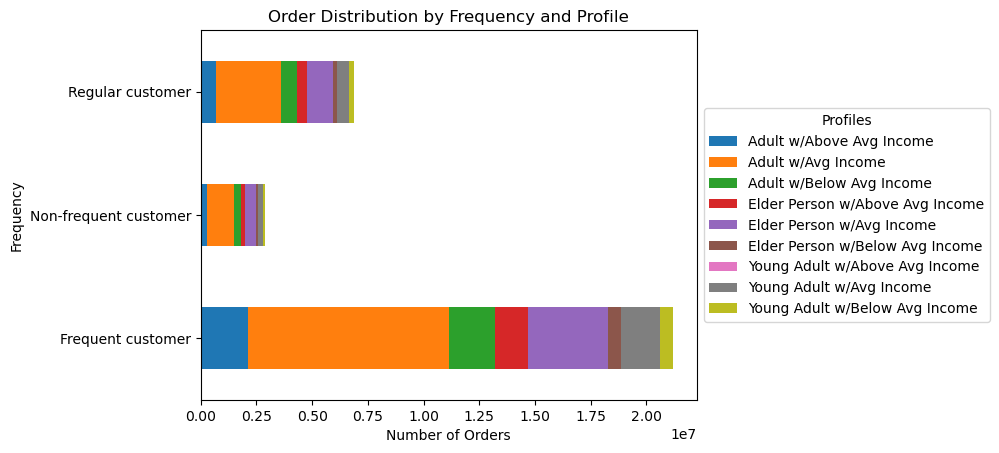

In [105]:
# Create clustered bar chart by frequency flag and LIH profile

bar_profiles_AI_freq = pivot_profiles_AI_freq.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_freq.set(xlabel='Number of Orders', ylabel='Frequency', title='Order Distribution by Frequency and Profile')
bar_profiles_AI_freq.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [106]:
# Export the bar chart to my files

bar_profiles_AI_freq.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_freq.png'), bbox_inches = 'tight')

### Age / Income Profile vs Price Range

In [107]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_price = pd.crosstab(df_include_merged['price_range_loc'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View results of crosstab creation

pivot_profiles_AI_price

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
price_range_loc,,,,,,,,,
High-range product,43724,180917,22220,30297,73452,3166,872,34808,8497
Low-range product,911065,3919088,1219298,620271,1578723,360105,10428,743395,312467
Mid-range product,2094995,9042925,1919594,1437863,3622441,469226,23567,1728211,552949


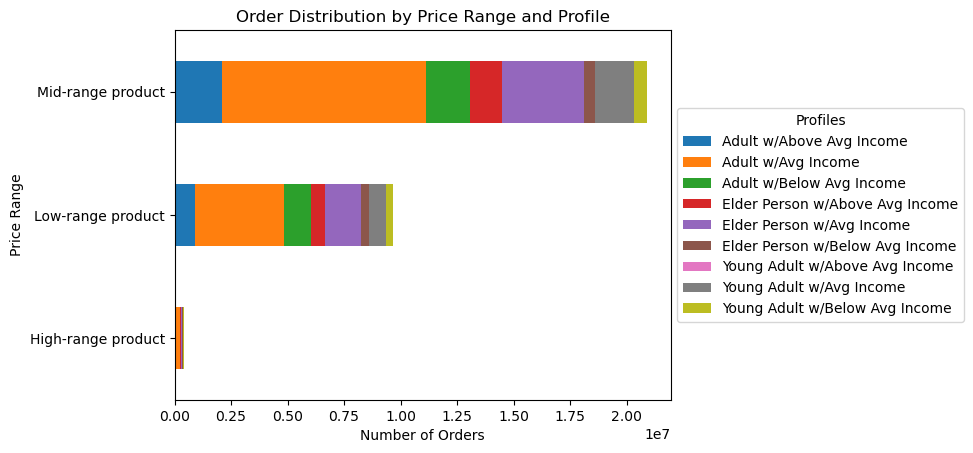

In [108]:
# Create clustered bar chart by frequency flag and LIH profile

bar_profiles_AI_price = pivot_profiles_AI_price.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_price.set(xlabel='Number of Orders', ylabel='Price Range', title='Order Distribution by Price Range and Profile')
bar_profiles_AI_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [109]:
# Export the bar chart to my files

bar_profiles_AI_price.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_price.png'), bbox_inches = 'tight')

### Age / Income Profile vs Loyalty

In [110]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_AI_loyalty = pd.crosstab(df_include_merged['loyalty_flag'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View results of crosstab creation

pivot_profiles_AI_loyalty

Customer_Profile_Age_Income,Adult w/Above Avg Income,Adult w/Avg Income,Adult w/Below Avg Income,Elder Person w/Above Avg Income,Elder Person w/Avg Income,Elder Person w/Below Avg Income,Young Adult w/Above Avg Income,Young Adult w/Avg Income,Young Adult w/Below Avg Income
loyalty_flag,,,,,,,,,
Loyal customer,1019463,4408697,988393,698360,1769825,255773,14681,851719,277182
New customer,455418,1977110,567431,320230,802316,154113,3268,378370,145439
Regular customer,1574903,6757123,1605288,1069841,2702475,422611,16918,1276325,451292


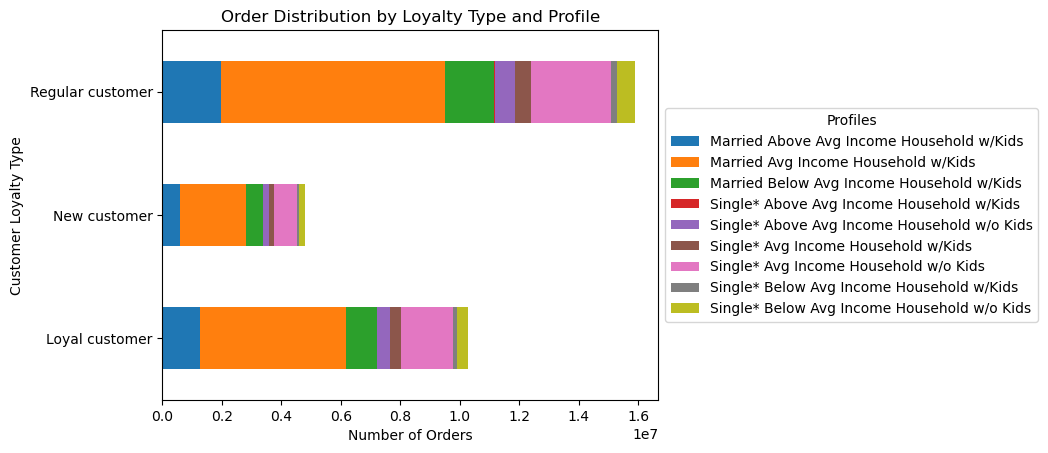

In [111]:
# Create clustered bar chart by region and LIH profile

bar_profiles_AI_loyalty = pivot_profiles_LIH_loyalty.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_profiles_AI_loyalty.set(xlabel='Number of Orders', ylabel='Customer Loyalty Type', title='Order Distribution by Loyalty Type and Profile')
bar_profiles_AI_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Profiles')

In [112]:
# Export the bar chart to my files

bar_profiles_AI_loyalty.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_profiles_AI_loyalty.png'), bbox_inches = 'tight')

# 04. Notebook Wrapup

#### Step 10 - Tidy up your script, export your final data set, and save your notebook.

In [113]:
# Check dimensions of final df

df_include_merged.shape

(30964564, 39)

In [114]:
# Export new dataframe as pickle file to Prepared Data folder

df_include_merged.to_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_include_final.pkl'))